In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('hypertension_dataset.csv')

In [ ]:
df[["Age", "BMI", "Cholesterol", "Systolic_BP", "Alcohol_Intake", "Heart_Rate", "LDL", "HDL", "Triglycerides", "Glucose", "Stress_Level", "Salt_Intake", "Sleep_Duration"]].corr()

,Age,BMI,Cholesterol,Systolic_BP,Alcohol_Intake,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Stress_Level,Salt_Intake,Sleep_Duration
Age,1.000000,-0.003456,-0.006175,-0.001648,0.001643,0.000824,-0.000835,0.000624,-0.000211,0.004335,-0.003995,0.003421,0.001854
BMI,-0.003456,1.000000,0.001950,-0.001971,-0.003484,-0.001094,0.001951,-0.001538,-0.001972,-0.000850,0.001420,-0.000851,-0.000184
Cholesterol,-0.006175,0.001950,1.000000,-0.002926,-0.003171,0.001410,-0.000040,-0.002184,-0.003218,-0.001679,-0.000644,-0.000011,0.000529
Systolic_BP,-0.001648,-0.001971,-0.002926,1.000000,0.001646,0.000044,-0.000085,0.002046,0.003268,0.001146,0.001470,0.005130,0.000293
Alcohol_Intake,0.001643,-0.003484,-0.003171,0.001646,1.000000,-0.002020,-0.005033,-0.000306,0.004281,0.000204,0.003204,-0.004040,-0.001967
Heart_Rate,0.000824,-0.001094,0.001410,0.000044,-0.002020,1.000000,0.001403,-0.001822,0.000292,-0.003681,0.000850,0.001634,0.000636
LDL,-0.000835,0.001951,-0.000040,-0.000085,-0.005033,0.001403,1.000000,0.002633,-0.004567,-0.002340,0.000795,-0.003967,-0.002387
HDL,0.000624,-0.001538,-0.002184,0.002046,-0.000306,-0.001822,0.002633,1.000000,0.001635,0.002202,-0.000924,-0.004727,-0.003704
Triglycerides,-0.000211,-0.001972,-0.003218,0.003268,0.004281,0.000292,-0.004567,0.001635,1.000000,0.000372,0.001572,-0.001156,-0.000210
Glucose,0.004335,-0.000850,-0.001679,0.001146,0.000204,-0.003681,-0.002340,0.002202,0.000372,1.000000,-0.004169,-0.000900,-0.001990


In [ ]:
df["Hypertension"].value_counts(normalize = True)

,proportion
Hypertension,
High,0.718823
Low,0.281177


In [ ]:
#research question 1
high_counts = df[df['Hypertension'] == 'High'].groupby('Country').size().reset_index(name='Hypertension_Count')
print(high_counts)

         Country  Hypertension_Count
0      Argentina                6225
1      Australia                6253
2         Brazil                6361
3         Canada                6203
4          China                6172
5         France                6276
6        Germany                6311
7          India                6286
8      Indonesia                6295
9          Italy                6340
10         Japan                6306
11        Mexico                6230
12        Russia                6367
13  Saudi Arabia                6414
14  South Africa                6368
15   South Korea                6293
16         Spain                6227
17        Turkey                6293
18            UK                6245
19           USA                6316


In [ ]:
high_counts.nlargest(5, 'Hypertension_Count')

,Country,Hypertension_Count
13,Saudi Arabia,6414
14,South Africa,6368
12,Russia,6367
2,Brazil,6361
9,Italy,6340


In [ ]:
high_counts.nsmallest(5, 'Hypertension_Count')

,Country,Hypertension_Count
4,China,6172
3,Canada,6203
0,Argentina,6225
16,Spain,6227
11,Mexico,6230


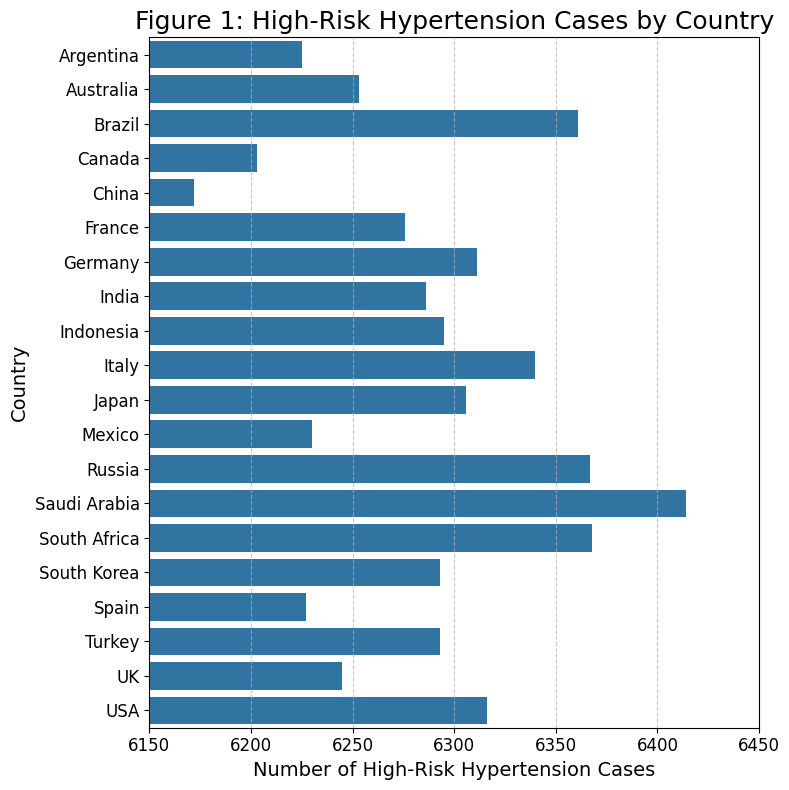

In [ ]:
plt.figure(figsize=(8, 8))
f1 = sns.barplot(data=high_counts, x='Hypertension_Count', y='Country')
plt.xlabel('Number of High-Risk Hypertension Cases', fontsize =14)
plt.ylabel('Country', fontsize = 14)
plt.title('Figure 1: High-Risk Hypertension Cases by Country', fontsize = 18)
f1.tick_params(axis='both', labelsize=12)
plt.xlim(6150, 6450) ## to better zoom into areas of interest because our values are so close to each other
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
#research question 2
#divided the dataset into seven age groups: 18-29, 30-39, 40-49, 50-59, 60-69, 70-79, and 80-89
bins = [18, 30, 40, 50, 60, 70, 80, 90]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df.head(5)

,Country,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,...,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Gender,Education_Level,Employment_Status,Hypertension,Age_group
0,UK,58,29.5,230,160,79,Never,27.9,Low,Yes,...,80,100,75,72,179,Female,Primary,Unemployed,High,50-59
1,Spain,34,36.2,201,120,84,Never,27.5,High,Yes,...,56,77,47,90,113,Male,Secondary,Unemployed,High,30-39
2,Indonesia,73,18.2,173,156,60,Current,1.8,High,Yes,...,75,162,56,81,101,Male,Primary,Employed,Low,70-79
3,Canada,60,20.3,183,122,94,Never,11.6,Moderate,Yes,...,71,164,93,94,199,Female,Secondary,Retired,High,60-69
4,France,73,21.8,296,91,97,Never,29.1,Moderate,Yes,...,52,108,74,226,157,Female,Primary,Employed,High,70-79


In [ ]:
df['hypertension_binary'] = df['Hypertension'].apply(lambda x: 1 if x == 'High' else 0)
X_age = sm.add_constant(df[['Age']])
y_age = df['hypertension_binary']

logit_model = sm.Logit(y_age, X_age)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.594056
         Iterations 5
                            Logit Regression Results                           
Dep. Variable:     hypertension_binary   No. Observations:               174982
Model:                           Logit   Df Residuals:                   174980
Method:                            MLE   Df Model:                            1
Date:                 Fri, 09 May 2025   Pseudo R-squ.:               9.306e-06
Time:                         01:56:51   Log-Likelihood:            -1.0395e+05
converged:                        True   LL-Null:                   -1.0395e+05
Covariance Type:             nonrobust   LLR p-value:                    0.1643
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9577      0.015     65.159      0.000       0.929       0.986
Age           -0.0004

In [ ]:
df1 = pd.get_dummies(df['Hypertension'])
df['High_Risk'] = df['Hypertension'].map({'Low': 0, 'High': 1})
df = pd.concat([df, df1], axis=1).reindex(df.index)
df.head(5)

,Country,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,...,Glucose,Gender,Education_Level,Employment_Status,Hypertension,Age_group,hypertension_binary,High_Risk,High,Low
0,UK,58,29.5,230,160,79,Never,27.9,Low,Yes,...,179,Female,Primary,Unemployed,High,50-59,1,1,True,False
1,Spain,34,36.2,201,120,84,Never,27.5,High,Yes,...,113,Male,Secondary,Unemployed,High,30-39,1,1,True,False
2,Indonesia,73,18.2,173,156,60,Current,1.8,High,Yes,...,101,Male,Primary,Employed,Low,70-79,0,0,False,True
3,Canada,60,20.3,183,122,94,Never,11.6,Moderate,Yes,...,199,Female,Secondary,Retired,High,60-69,1,1,True,False
4,France,73,21.8,296,91,97,Never,29.1,Moderate,Yes,...,157,Female,Primary,Employed,High,70-79,1,1,True,False


In [ ]:
X_age = df[['Age']]
y_age = df['hypertension_binary']
model_age = LogisticRegression()
model_age.fit(X_age, y_age)
print("Age Logistic Regression Coef:", model_age.coef_)

odds_ratio = np.exp(model_age.coef_)
print(f"Odds Ratio for Age: {odds_ratio}")

Age Logistic Regression Coef: [[-0.00035582]]
Odds Ratio for Age: [[0.99964424]]


<ipython-input-13-ecf333b38f61>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Age_group')['High_Risk']


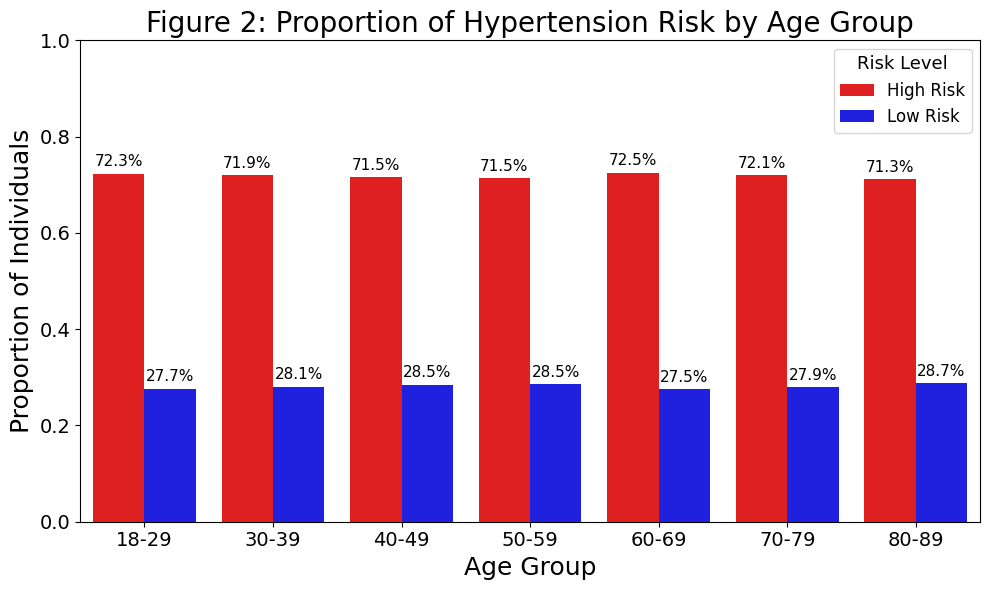

In [ ]:
proportion_df = (
    df.replace({'High_Risk': {1: 'High Risk', 0: 'Low Risk'}})
    .groupby('Age_group')['High_Risk']
    .value_counts(normalize=True)
    .rename('Proportion')
    .reset_index()
)

plt.figure(figsize=(10, 6))
f2 = sns.barplot(data=proportion_df, x='Age_group', y='Proportion', hue='High_Risk',
    palette={'High Risk': 'red', 'Low Risk': 'blue'}
)

for container in f2.containers:
    f2.bar_label(container, labels=[f"{h:.1%}" for h in container.datavalues], label_type='edge', padding=3, fontsize=11)

plt.title('Figure 2: Proportion of Hypertension Risk by Age Group', fontsize = 20)
plt.xlabel('Age Group', fontsize = 18)
plt.ylabel('Proportion of Individuals', fontsize = 18)
f2.tick_params(axis='both', labelsize=14)
plt.ylim(0, 1)
plt.legend(title='Risk Level', title_fontsize=13, fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
#research question 3
# filter the dataset to my specifc variables
df_model = df[['Smoking_Status', 'Age', 'Hypertension', 'hypertension_binary', 'Age_group']].copy()
df_model.head()

,Smoking_Status,Age,Hypertension,hypertension_binary,Age_group
0,Never,58,High,1,50-59
1,Never,34,High,1,30-39
2,Current,73,Low,0,70-79
3,Never,60,High,1,60-69
4,Never,73,High,1,70-79


In [ ]:
df_model.isnull().sum()
df_model.dropna(inplace=True)
df_model

,Smoking_Status,Age,Hypertension,hypertension_binary,Age_group
0,Never,58,High,1,50-59
1,Never,34,High,1,30-39
2,Current,73,Low,0,70-79
3,Never,60,High,1,60-69
4,Never,73,High,1,70-79
...,...,...,...,...,...
174977,Never,51,Low,0,50-59
174978,Never,89,High,1,80-89
174979,Former,43,High,1,40-49
174980,Never,48,High,1,40-49


In [ ]:
df_model['Smoking_Status_binary'] = df_model['Smoking_Status'].map({'Never': 0, 'Former': 1, 'Current': 2})
df_model['Smoking_Status_binary'].head()

,Smoking_Status_binary
0,0
1,0
2,2
3,0
4,0


In [ ]:
df_model['Age_Group_binary'] = df_model['Age_group'].astype('category').cat.codes
df_model['Age_Group_binary']

,Age_Group_binary
0,3
1,1
2,5
3,4
4,5
...,...
174977,3
174978,6
174979,2
174980,2


In [ ]:
df_model

,Smoking_Status,Age,Hypertension,hypertension_binary,Age_group,Smoking_Status_binary,Age_Group_binary
0,Never,58,High,1,50-59,0,3
1,Never,34,High,1,30-39,0,1
2,Current,73,Low,0,70-79,2,5
3,Never,60,High,1,60-69,0,4
4,Never,73,High,1,70-79,0,5
...,...,...,...,...,...,...,...
174977,Never,51,Low,0,50-59,0,3
174978,Never,89,High,1,80-89,0,6
174979,Former,43,High,1,40-49,1,2
174980,Never,48,High,1,40-49,0,2


In [ ]:
#  predictors
X = df_model[['Smoking_Status_binary', 'Age_Group_binary']]

# intercept
X = sm.add_constant(X)

# vif
vif_df = pd.DataFrame()
vif_df['Feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_df

,Feature,VIF
0,const,4.566837
1,Smoking_Status_binary,1.000001
2,Age_Group_binary,1.000001


In [ ]:
logit_model = smf.logit(formula='hypertension_binary ~ Smoking_Status_binary + Age_Group_binary', data=df_model).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.594053
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     hypertension_binary   No. Observations:               174982
Model:                           Logit   Df Residuals:                   174979
Method:                            MLE   Df Model:                            2
Date:                 Fri, 09 May 2025   Pseudo R-squ.:               1.481e-05
Time:                         01:56:53   Log-Likelihood:            -1.0395e+05
converged:                        True   LL-Null:                   -1.0395e+05
Covariance Type:             nonrobust   LLR p-value:                    0.2145
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.9562      0.011     84.005      0.000       0.934       0.978
Smoking_Status_binary    -0.0066      0.007     -1.009      0.313      -0.019       0.006
Age_Group_binary         -0.0038      0.003     -1.434      0.151      -0.009       0.001
=========================================================================================
"""

<ipython-input-21-8fdf68be9996>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  colorbar.ax.set_yticklabels([f"{x:.2f}" for x in colorbar.get_ticks()])


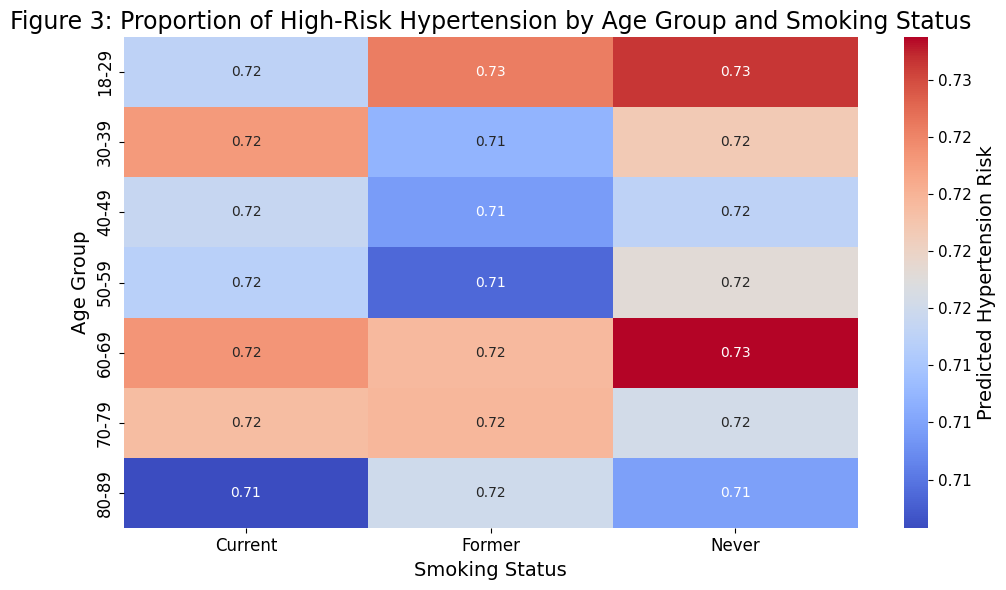

In [ ]:
rep = pd.crosstab(
    df_model['Age_group'],
    df_model['Smoking_Status'],
    df_model['hypertension_binary'],
    aggfunc='mean'
)

plt.figure(figsize=(10, 6))
f3 = sns.heatmap(rep, annot=True, cmap='coolwarm', cbar_kws={'label': 'Proportion of High-Risk Hypertension'})

colorbar = f3.collections[0].colorbar
colorbar.ax.set_yticklabels([f"{x:.2f}" for x in colorbar.get_ticks()])

plt.title('Figure 3: Proportion of High-Risk Hypertension by Age Group and Smoking Status', fontsize = 17)
plt.xlabel('Smoking Status', fontsize = 14)
plt.ylabel('Age Group', fontsize = 14)
cbar = f3.collections[0].colorbar
cbar.set_label("Predicted Hypertension Risk", fontsize=14)
f3.tick_params(axis='both', labelsize=12)
f3.collections[0].colorbar.ax.tick_params(labelsize=11)
plt.tight_layout()
plt.show()

In [ ]:
#research question 4
df["Stress_Level"].unique()
df["Sleep_Duration"].unique()

array([ 6.1,  9.8,  5.2,  7.5,  5. ,  8.1,  4. ,  5.8,  6.6,  8. ,  5.6,
        7.1,  6.2,  7.3,  6.4,  7. ,  8.5,  4.4,  4.3,  8.7,  9.3,  8.8,
        4.7,  9.6,  9.1,  5.1,  5.4,  7.4,  5.5,  4.8,  5.7,  8.6,  9.9,
        6.7,  8.4,  6.5,  6.9,  7.8,  6.8,  9. ,  6. ,  9.7,  7.2,  7.7,
        4.2,  4.9,  9.5,  9.4,  4.1,  6.3,  7.9,  8.2,  5.9,  4.6,  4.5,
        8.9,  8.3,  7.6, 10. ,  9.2,  5.3])

In [ ]:
stress = df[['Stress_Level', 'Hypertension']]
stress.describe()

,Stress_Level
count,174982.000000
mean,5.013041
std,2.582341
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,9.000000


In [ ]:
matrix = df[['Sleep_Duration','Stress_Level']].corr()
matrix

,Sleep_Duration,Stress_Level
Sleep_Duration,1.000000,-0.000166
Stress_Level,-0.000166,1.000000


In [ ]:
log_reg = smf.logit("High_Risk ~ Sleep_Duration + Stress_Level", data=df).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.594062
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              High_Risk   No. Observations:               174982
Model:                          Logit   Df Residuals:                   174979
Method:                           MLE   Df Model:                            2
Date:                Fri, 09 May 2025   Pseudo R-squ.:               2.056e-07
Time:                        01:56:54   Log-Likelihood:            -1.0395e+05
converged:                       True   LL-Null:                   -1.0395e+05
Covariance Type:            nonrobust   LLR p-value:                    0.9789
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.9420      0.024     38.554      0.000       0.894       0.990
Sleep_Duration    -0.0002      0.003     -0.065      0.948      -0.006       0.006
Stress_Level      -0.0004      0.002     -0.196      0.844      -0.004       0.004
==================================================================================
"""

In [ ]:
log_reg2 = smf.logit("High_Risk ~ Sleep_Duration + Stress_Level + (Sleep_Duration * Stress_Level)", data=df).fit()
log_reg2.summary()

Optimization terminated successfully.
         Current function value: 0.594053
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              High_Risk   No. Observations:               174982
Model:                          Logit   Df Residuals:                   174978
Method:                           MLE   Df Model:                            3
Date:                Fri, 09 May 2025   Pseudo R-squ.:               1.519e-05
Time:                        01:56:55   Log-Likelihood:            -1.0395e+05
converged:                       True   LL-Null:                   -1.0395e+05
Covariance Type:            nonrobust   LLR p-value:                    0.3679
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.0158      0.048     20.981      0.000       0.921       1.111
Sleep_Duration                 -0.0107      0.007     -1.599      0.110      -0.024       0.002
Stress_Level                   -0.0151      0.009     -1.760      0.078      -0.032       0.002
Sleep_Duration:Stress_Level     0.0021      0.001      1.765      0.078      -0.000       0.004
===============================================================================================
"""

In [ ]:
reg_results = pd.DataFrame(log_reg2.pvalues, columns=['reg2 p-values (w/ interaction)'])
reg_results['reg1 p-values (w/o interaction)'] = log_reg.pvalues
reg_results = reg_results[['reg1 p-values (w/o interaction)', 'reg2 p-values (w/ interaction)']]
reg_results

,reg1 p-values (w/o interaction),reg2 p-values (w/ interaction)
Intercept,0.000000,9.686950e-98
Sleep_Duration,0.948365,1.098059e-01
Stress_Level,0.844330,7.833650e-02
Sleep_Duration:Stress_Level,NaN,7.756932e-02


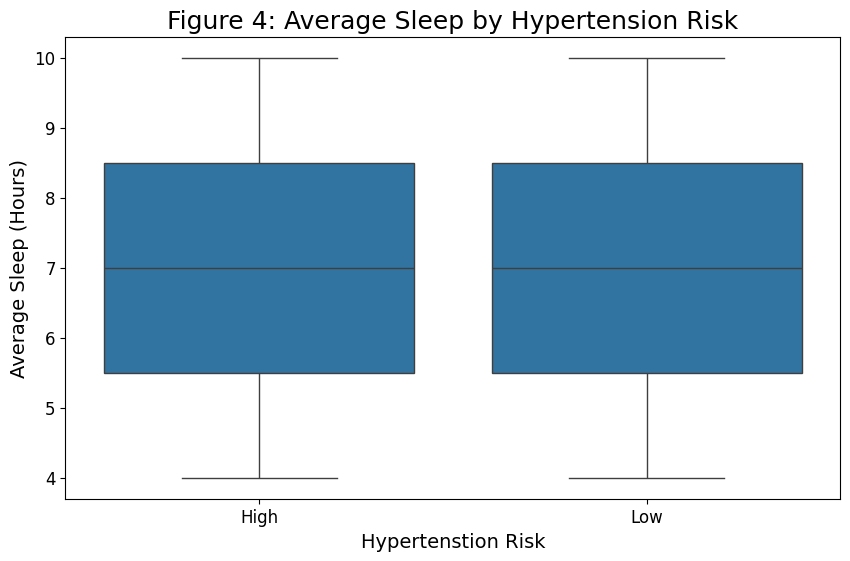

In [ ]:
plt.figure(figsize=(10, 6))
bx = sns.boxplot(x = df['Hypertension'], y = df['Sleep_Duration'], data = df)
plt.title('Figure 4: Average Sleep by Hypertension Risk', fontsize = 18)
plt.xlabel('Hypertenstion Risk', fontsize = 14)
plt.ylabel('Average Sleep (Hours)', fontsize = 14)
bx.tick_params(axis='both', labelsize=12)
plt.show()

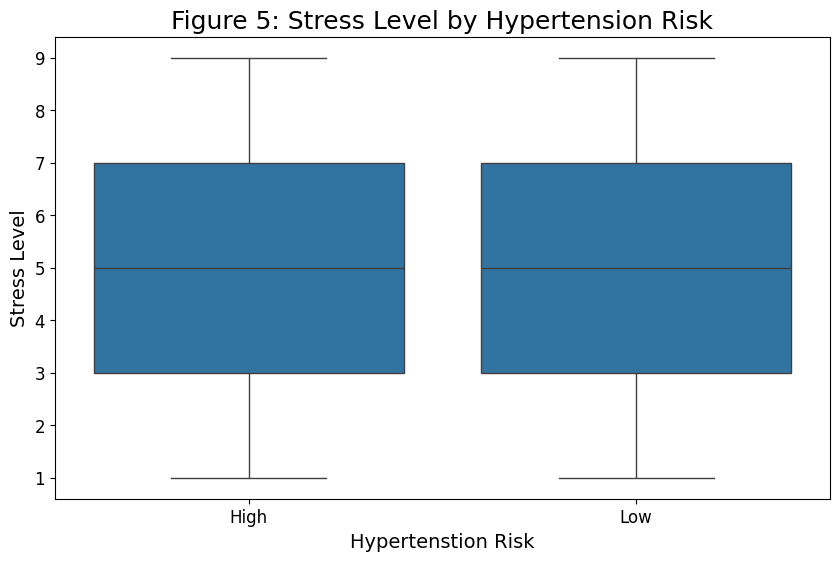

In [ ]:
plt.figure(figsize=(10, 6))
bx2 = sns.boxplot(x = df['Hypertension'], y = df['Stress_Level'], data = df)
plt.title('Figure 5: Stress Level by Hypertension Risk', fontsize = 18)
plt.xlabel('Hypertenstion Risk', fontsize = 14)
plt.ylabel('Stress Level', fontsize = 14)
bx2.tick_params(axis='both', labelsize=12)
plt.show()

<ipython-input-30-cdf1bd55138a>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Sleep_Bin', 'Stress_Bin'])['Predicted_Risk'].mean().unstack()
<ipython-input-30-cdf1bd55138a>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  colorbar.ax.set_yticklabels([f"{x:.2f}" for x in colorbar.get_ticks()])


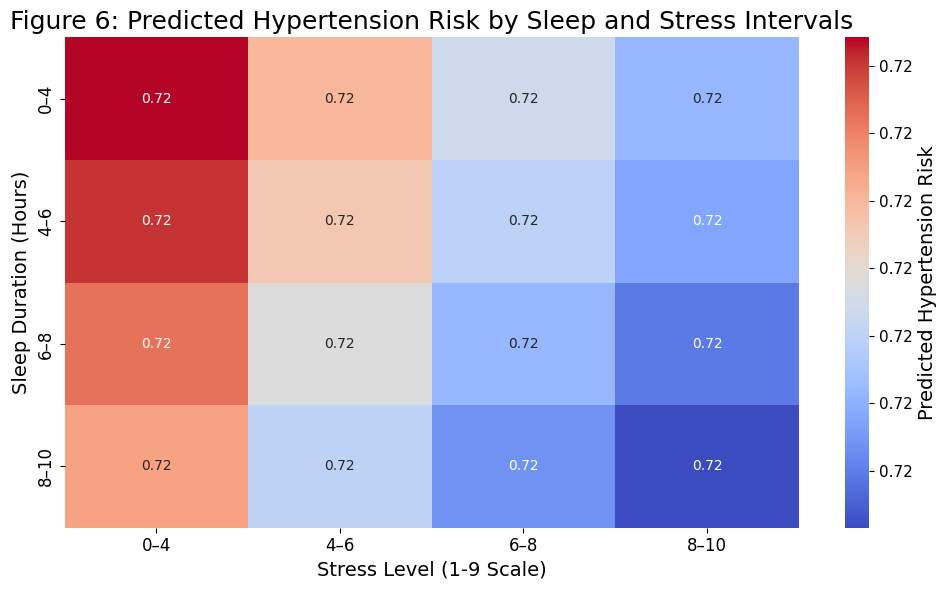

In [ ]:
df['Predicted_Risk'] = log_reg.predict()

df['Sleep_Bin'] = pd.cut(df['Sleep_Duration'], bins=[0, 4, 6, 8, 10], labels=['0–4', '4–6', '6–8', '8–10'])
df['Stress_Bin'] = pd.cut(df['Stress_Level'], bins=[0, 4, 6, 8, 10], labels=['0–4', '4–6', '6–8', '8–10'])

grouped = df.groupby(['Sleep_Bin', 'Stress_Bin'])['Predicted_Risk'].mean().unstack()

plt.figure(figsize=(10, 6))
f6 = sns.heatmap(grouped, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Predicted High Risk'})
plt.title('Figure 6: Predicted Hypertension Risk by Sleep and Stress Intervals', fontsize = 18)
plt.xlabel('Stress Level (1-9 Scale)', fontsize = 14)
plt.ylabel('Sleep Duration (Hours)', fontsize = 14)

colorbar = f6.collections[0].colorbar
colorbar.ax.set_yticklabels([f"{x:.2f}" for x in colorbar.get_ticks()])

cbar = f6.collections[0].colorbar
cbar.set_label("Predicted Hypertension Risk", fontsize=14)
f6.tick_params(axis='both', labelsize=12)
f6.collections[0].colorbar.ax.tick_params(labelsize=11)
plt.tight_layout()
plt.show()

In [ ]:
#research question 5
df = pd.read_csv('hypertension_dataset.csv')
df['Hypertension'] = df['Hypertension'].map({'High': 1, 'Low': 0})
X = df[['BMI']].dropna()
y = df['Hypertension'].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of logistic regression model: {accuracy}")


Accuracy of logistic regression model: 0.7174329228219561


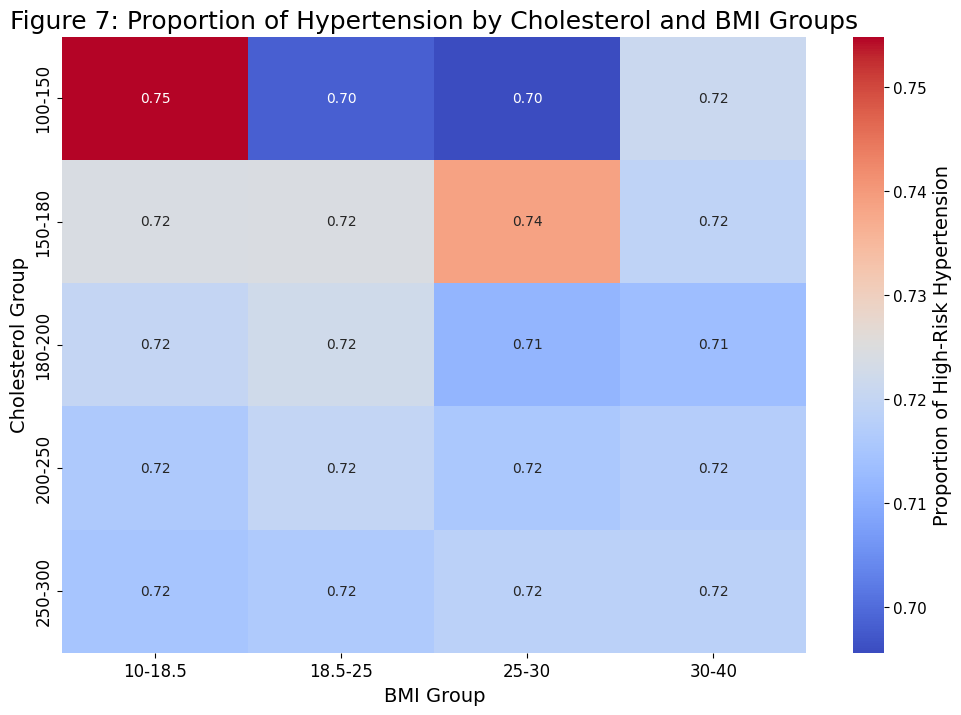

In [ ]:
df['Cholesterol_Group'] = pd.cut(df['Cholesterol'], bins=[100, 150, 180, 200, 250, 300], labels=['100-150', '150-180', '180-200', '200-250', '250-300'])
df['BMI_Group'] = pd.cut(df['BMI'], bins=[10, 18.5, 25, 30, 40, 50], labels=['10-18.5', '18.5-25', '25-30', '30-40', '40-50'])

rep = pd.crosstab(df['Cholesterol_Group'], df['BMI_Group'], values=df['Hypertension'], aggfunc='mean')

plt.figure(figsize=(12, 8))
f7 = sns.heatmap(rep, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Proportion of High-Risk Hypertension'})

cbar = f7.collections[0].colorbar
cbar.set_label("Proportion of High-Risk Hypertension", fontsize=14)

plt.title('Figure 7: Proportion of Hypertension by Cholesterol and BMI Groups', fontsize = 18)
plt.xlabel('BMI Group', fontsize = 14)
plt.ylabel('Cholesterol Group', fontsize = 14)
f7.tick_params(axis='both', labelsize=12)
f7.collections[0].colorbar.ax.tick_params(labelsize=11)
plt.show()

In [ ]:
cholesterol = df['Cholesterol'].dropna()
hypertension = df['Hypertension'].dropna()

t_statistic, p_value = stats.ttest_ind(cholesterol[hypertension == 1], cholesterol[hypertension == 0])

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Cholesterol has a statistically significant impact on Hypertension.")
else:
    print("Cholesterol does not have a statistically significant impact on Hypertension.")

T-statistic: -1.685455721207929
P-value: 0.09190246389775501
Cholesterol does not have a statistically significant impact on Hypertension.


In [ ]:
bmi = df['BMI'].dropna()
hypertension = df['Hypertension'].dropna()

t_statistic, p_value = stats.ttest_ind(bmi[hypertension == 1], bmi[hypertension == 0])

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("BMI has a statistically significant impact on Hypertension.")
else:
    print("BMI does not have a statistically significant impact on Hypertension.")


T-statistic: -0.4244595260315721
P-value: 0.6712312385628674
BMI does not have a statistically significant impact on Hypertension.
